# The Oscars

Dalton Hahn (2762306)

## Shakespearean Play Data

https://www.kaggle.com/kingburrito666/shakespeare-plays/download

## Data Visualization and Storytelling

### "Does Shakespeare become more verbose with his later plays than his earlier plays?"

In [1]:
import warnings
warnings.filterwarnings("ignore")

import pandas as pd
import numpy as np
import datetime as dt
import seaborn as sns
import matplotlib.pyplot as plt
import math
from statistics import mean, stdev
import re

In [2]:
df = pd.read_csv("../data/processed/play_year.csv")

In [3]:
df.head()

,Unnamed: 0,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Year
0,0,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",1597
1,1,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",1597
2,2,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,1597
3,3,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,1597
4,4,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,1597


## Number of lines per year

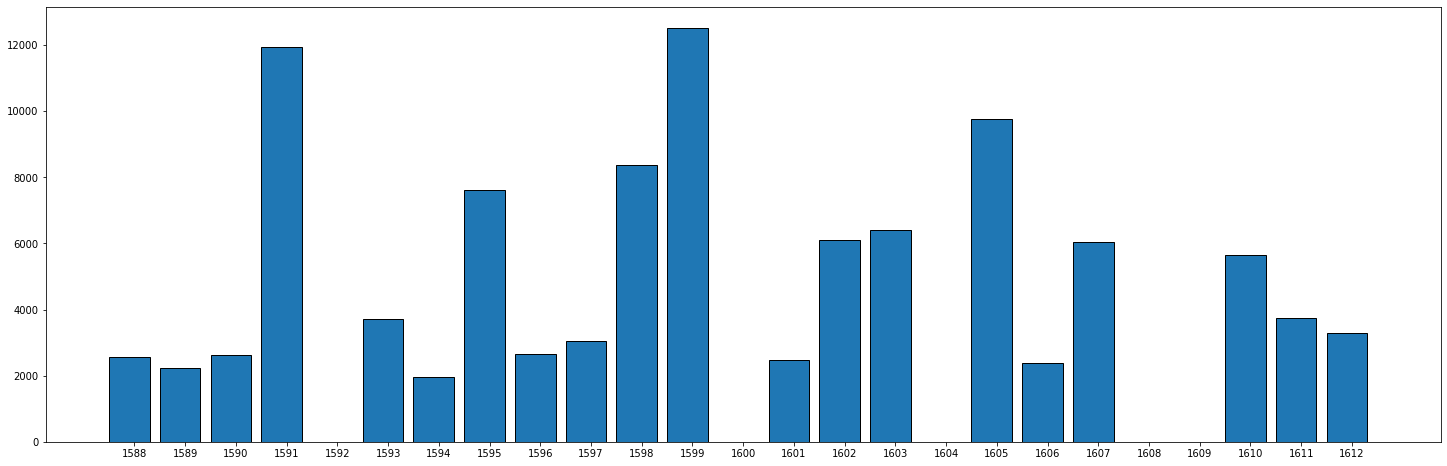

In [4]:
num_bins = max(df["Year"]) - min(df["Year"])
plt.figure(figsize=(25,8))
plt.hist(df["Year"], num_bins, align='left', width=0.8, edgecolor="black")
plt.xticks(range(min(df["Year"]), max(df["Year"])))
plt.show()

## Let's calculate the number of words in each of Shakespeare's plays and then group them into a bar chart based on year

In [5]:
# Number of Words per Year

for index, row in df.iterrows():
    row = row.copy()
    num_words = len(re.findall(r'\w+', row["PlayerLine"]))

    df.loc[index, "Words"] = num_words

In [6]:
df.head()

,Unnamed: 0,Dataline,Play,PlayerLinenumber,ActSceneLine,Player,PlayerLine,Year,Words
0,0,4,Henry IV,1.0,1.1.1,KING HENRY IV,"So shaken as we are, so wan with care,",1597,9.0
1,1,5,Henry IV,1.0,1.1.2,KING HENRY IV,"Find we a time for frighted peace to pant,",1597,9.0
2,2,6,Henry IV,1.0,1.1.3,KING HENRY IV,And breathe short-winded accents of new broils,1597,8.0
3,3,7,Henry IV,1.0,1.1.4,KING HENRY IV,To be commenced in strands afar remote.,1597,7.0
4,4,8,Henry IV,1.0,1.1.5,KING HENRY IV,No more the thirsty entrance of this soil,1597,8.0


In [7]:
plays = df["Play"].unique()
p_years = list()
counter = 0

for play in plays:
    for index,row in df.iterrows():
        if row["Play"] == play:
            year = row["Year"]
            p_years.append(str(year)+play)
            break

In [8]:
word_counts = dict.fromkeys(p_years, 0)
print(word_counts.keys())

for index, row in df.iterrows():
    test_key = (row["Play"]+str(row["Year"]))
    #print(test_key)

dict_keys(['1597Henry IV', '1591Henry VI Part 1', '1591Henry VI Part 2', '1591Henry VI Part 3', '1598Alls well that ends well', '1599As you like it', '1607Antony and Cleopatra', '1594A Comedy of Errors', '1605Coriolanus', '1611Cymbeline', '1599Hamlet', '1599Henry V', '1613Henry VIII', '1595King John', '1599Julius Caesar', '1605King Lear', '1598Loves Labours Lost', '1606macbeth', '1603Measure for measure', '1596Merchant of Venice', '1602Merry Wives of Windsor', '1595A Midsummer nights dream', '1598Much Ado about nothing', '1603Othello', '1607Pericles', '1595Richard II', '1593Richard III', '1591Romeo and Juliet', '1590Taming of the Shrew', '1610The Tempest', '1605Timon of Athens', '1588Titus Andronicus', '1602Troilus and Cressida', '1601Twelfth Night', '1589Two Gentlemen of Verona', '1610A Winters Tale'])


## Now let's group these word counts by the year they were written

In [9]:
# bars for each year (list of word counts for that year)
# position year bars together
# plot year by year with color

# set width of bar
"""
barWidth = 0.25
 
# set height of bar
bars1 = [12, 30, 1, 8, 22]
bars2 = [28, 6, 16, 5, 10]
bars3 = [29, 3, 24, 25, 17]
 
# Set position of bar on X axis
r1 = np.arange(len(bars1))
r2 = [x + barWidth for x in r1]
r3 = [x + barWidth for x in r2]
 
# Make the plot
plt.figure(figsize=(25,8))
plt.bar(r1, bars1, color='#7f6d5f', width=barWidth, edgecolor='white', label='var1')
plt.bar(r2, bars2, color='#557f2d', width=barWidth, edgecolor='white', label='var2')
plt.bar(r3, bars3, color='#2d7f5e', width=barWidth, edgecolor='white', label='var3')
 
# Add xticks on the middle of the group bars
plt.xlabel('year', fontweight='bold')
plt.xticks(range(min(df["Year"]), max(df["Year"])))
 
# Create legend & Show graphic
plt.legend()
plt.show()
"""

'\nbarWidth = 0.25\n \n# set height of bar\nbars1 = [12, 30, 1, 8, 22]\nbars2 = [28, 6, 16, 5, 10]\nbars3 = [29, 3, 24, 25, 17]\n \n# Set position of bar on X axis\nr1 = np.arange(len(bars1))\nr2 = [x + barWidth for x in r1]\nr3 = [x + barWidth for x in r2]\n \n# Make the plot\nplt.figure(figsize=(25,8))\nplt.bar(r1, bars1, color=\'#7f6d5f\', width=barWidth, edgecolor=\'white\', label=\'var1\')\nplt.bar(r2, bars2, color=\'#557f2d\', width=barWidth, edgecolor=\'white\', label=\'var2\')\nplt.bar(r3, bars3, color=\'#2d7f5e\', width=barWidth, edgecolor=\'white\', label=\'var3\')\n \n# Add xticks on the middle of the group bars\nplt.xlabel(\'year\', fontweight=\'bold\')\nplt.xticks(range(min(df["Year"]), max(df["Year"])))\n \n# Create legend & Show graphic\nplt.legend()\nplt.show()\n'

## CONCLUSIONS

This notebook turned out to be a lot more of a headache than I anticipated and grouping word/line count based on year became a more tedious process than initially planned for.  The remaining notebooks show three other visualizations that better reflect and more clearly show some of the properties of Shakespeare's work.